In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CSV dosyasının konumunu buraya yaz
csv_path = "decode_results.csv"  # Örnek yol, kendine göre değiştir

# CSV'yi oku
df = pd.read_csv(csv_path)

In [3]:
# Fazlalık oranını hesapla
df["overhead"] = df["n"] / df["k"]

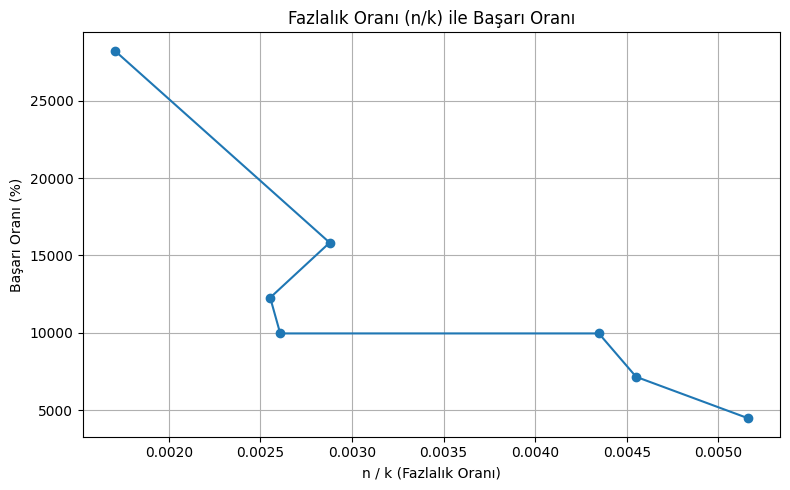

In [4]:
# Grafik 1: n vs success_rate
plt.figure(figsize=(8, 5))
plt.plot(df["overhead"], df["success_rate"], marker='o')
plt.title("Fazlalık Oranı (n/k) ile Başarı Oranı")
plt.xlabel("n / k (Fazlalık Oranı)")
plt.ylabel("Başarı Oranı (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

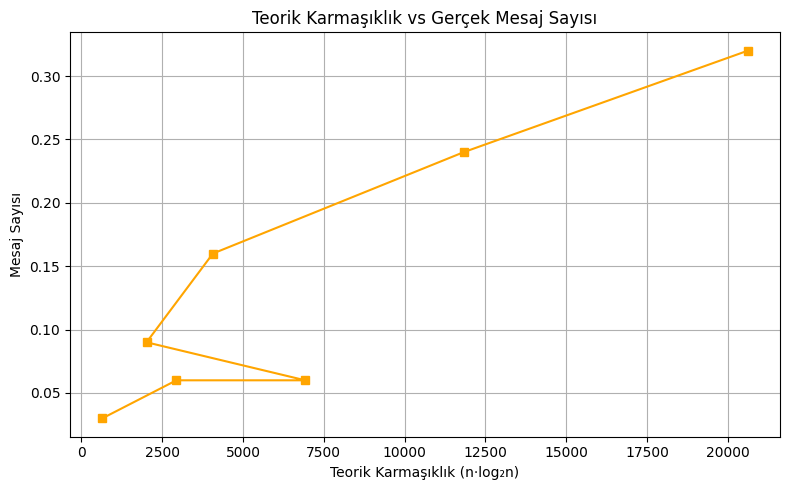

In [5]:
# Grafik 2: msg_complexity vs message_count
plt.figure(figsize=(8, 5))
plt.plot(df["msg_complexity"], df["message_count"], marker='s', color='orange')
plt.title("Teorik Karmaşıklık vs Gerçek Mesaj Sayısı")
plt.xlabel("Teorik Karmaşıklık (n·log₂n)")
plt.ylabel("Mesaj Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()

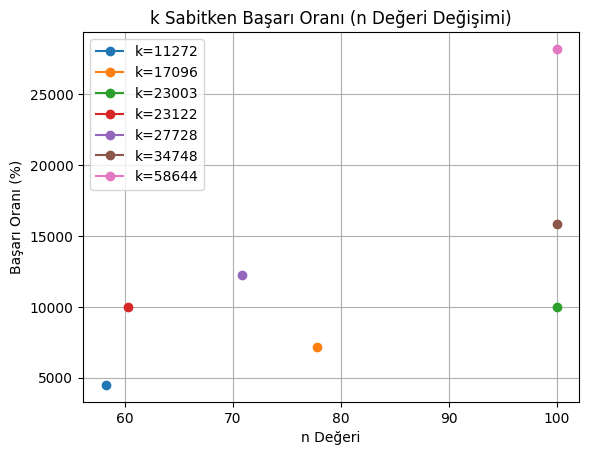

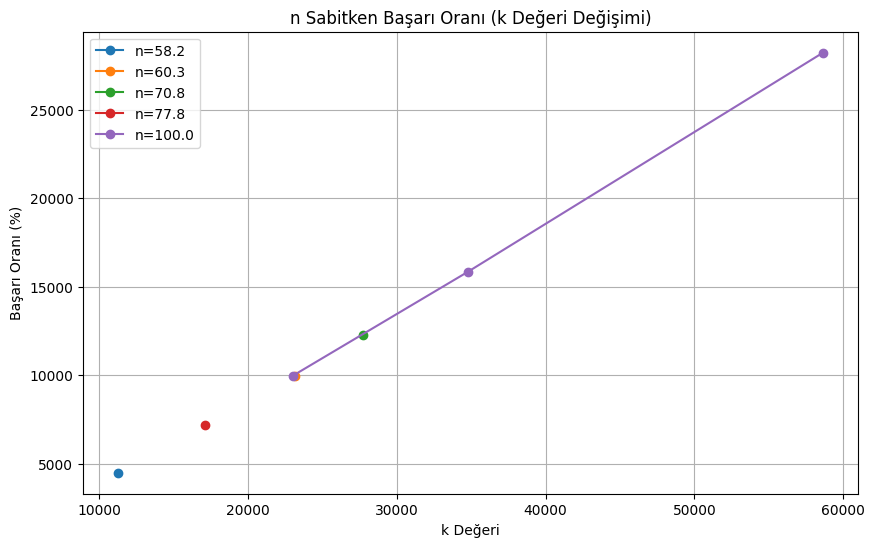

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini CSV dosyasına kaydet
df.to_csv("decode_results.csv", index=False)

# CSV dosyasını oku
csv_path = "decode_results.csv"
df = pd.read_csv(csv_path)

#plt.figure(figsize=(10, 6))
k_values = sorted(df['k'].unique())
for k in k_values:
    subset = df[df['k'] == k].sort_values('n')
    n_values = subset['n']
    y_values = subset['success_rate']
    plt.plot(n_values, y_values, marker='o', label=f'k={k}')
plt.title('k Sabitken Başarı Oranı (n Değeri Değişimi)')
plt.xlabel('n Değeri')
plt.ylabel('Başarı Oranı (%)')
plt.legend()
plt.grid(True)
plt.show()

# 2. n sabitken k'nin değişimi için başarı oranı grafiği
plt.figure(figsize=(10, 6))
n_values = sorted(df['n'].unique())
for n in n_values:
    subset = df[df['n'] == n].sort_values('k')
    k_values = subset['k']
    y_values = subset['success_rate']
    plt.plot(k_values, y_values, marker='o', label=f'n={n}')
plt.title('n Sabitken Başarı Oranı (k Değeri Değişimi)')
plt.xlabel('k Değeri')
plt.ylabel('Başarı Oranı (%)')
plt.legend()
plt.grid(True)
plt.show()